In [9]:
from conv import Conv3x3
import pandas as pd
import numpy as np
from maxpool import MaxPool2
from softmax import Softmax
import load_gambar
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as time

train_images = load_gambar.X_data_train
train_labels = load_gambar.Y_label
train_labels = np.array(train_labels)
test_images = load_gambar.X_data_test
test_labels = np.array(load_gambar.Y_test)

# conv = Conv3x3(8)
# pool = MaxPool2()
# softmax = Softmax(111 * 111 * 8, 20)

conv = Conv3x3(10)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8
softmax = Softmax(13 * 13 * 10, 20) # 13x13x8 -> 10

def forward(image, label):
  # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
  # to work with. This is standard practice.
  out = conv.forward((image / 255) - 0.5)
  out = pool.forward(out)
  # print(out.shape)
  out = softmax.forward(out)

  # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
  loss = -np.log(out[label])
  acc = 1 if np.argmax(out) == label else 0

  return out, loss, acc
def train(im, label, lr=.0005):
  '''
  Completes a full training step on the given image and label.
  Returns the cross-entropy loss and accuracy.
  - image is a 2d numpy array
  - label is a digit
  - lr is the learning rate
  '''
  # Forward
  out, loss, acc = forward(im, label)
  # out = [0.8 , 0.2]

  # Calculate initial gradient
  gradient = np.zeros(20)
  gradient[label] = -1 / out[label]

  # Backprop
  gradient = softmax.backprop(gradient, lr)
  gradient = pool.backprop(gradient)
  gradient = conv.backprop(gradient, lr)

  return loss, acc

print('MNIST CNN initialized!')

all_loss = []
all_acc = []
akurasi_perepoch =[]
loss_perepoch = []
# Train the CNN for 2 epochs
for epoch in range(10 ):
  print('--- Epoch %d ---' % (epoch + 1))

  # Shuffle the training data
  # permutation = np.random.permutation(len(train_images))
  # train_images = train_images[permutation]
  # train_labels = train_labels[permutation]

  waktuEpoch = time.time()
  waktuIterasi = time.time()
  # Train!
  list_loss = []
  list_accuracy = []
 
  loss = 0
  num_correct = 0
  for i, (im, label) in enumerate(zip(train_images, train_labels)):
    if i % 100 == 99:
      num_correct = (num_correct/100)*100
      print(
        '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%% | ' %
        (i + 1, loss / 100, num_correct) 
      )
      waktuIterasi = time.time()
      list_loss.append(loss / 100)
      list_accuracy.append(num_correct)
      loss = 0
      num_correct = 0

    l, acc = train(im, label)
    loss += l
    num_correct = num_correct + acc
  all_loss.append(list_loss)
  all_acc.append(list_accuracy)
  
  print("Akurasi per epoch : ", np.mean(list_accuracy))
  print("Loss per epoch : ",np.mean(list_loss) )
  akurasi_perepoch.append(np.mean(list_accuracy))
  loss_perepoch.append(np.mean(list_loss))


MNIST CNN initialized!
--- Epoch 1 ---
[Step 100] Past 100 steps: Average Loss 2.967 | Accuracy: 4% | 
[Step 200] Past 100 steps: Average Loss 3.001 | Accuracy: 2% | 
[Step 300] Past 100 steps: Average Loss 3.004 | Accuracy: 7% | 
[Step 400] Past 100 steps: Average Loss 3.010 | Accuracy: 3% | 
[Step 500] Past 100 steps: Average Loss 2.997 | Accuracy: 4% | 
[Step 600] Past 100 steps: Average Loss 2.995 | Accuracy: 7% | 
[Step 700] Past 100 steps: Average Loss 2.998 | Accuracy: 7% | 
[Step 800] Past 100 steps: Average Loss 3.003 | Accuracy: 4% | 
[Step 900] Past 100 steps: Average Loss 2.984 | Accuracy: 6% | 
[Step 1000] Past 100 steps: Average Loss 3.000 | Accuracy: 7% | 
[Step 1100] Past 100 steps: Average Loss 3.006 | Accuracy: 2% | 
[Step 1200] Past 100 steps: Average Loss 2.999 | Accuracy: 3% | 
[Step 1300] Past 100 steps: Average Loss 2.984 | Accuracy: 9% | 
[Step 1400] Past 100 steps: Average Loss 3.007 | Accuracy: 3% | 
[Step 1500] Past 100 steps: Average Loss 2.997 | Accuracy: 4

[Step 1500] Past 100 steps: Average Loss 2.193 | Accuracy: 34% | 
[Step 1600] Past 100 steps: Average Loss 2.083 | Accuracy: 38% | 
[Step 1700] Past 100 steps: Average Loss 2.188 | Accuracy: 37% | 
[Step 1800] Past 100 steps: Average Loss 2.260 | Accuracy: 35% | 
[Step 1900] Past 100 steps: Average Loss 2.067 | Accuracy: 36% | 
[Step 2000] Past 100 steps: Average Loss 2.096 | Accuracy: 36% | 
[Step 2100] Past 100 steps: Average Loss 2.143 | Accuracy: 34% | 
Akurasi per epoch :  32.095238095238095
Loss per epoch :  2.2418778483406716
--- Epoch 7 ---
[Step 100] Past 100 steps: Average Loss 1.992 | Accuracy: 31% | 
[Step 200] Past 100 steps: Average Loss 2.131 | Accuracy: 31% | 
[Step 300] Past 100 steps: Average Loss 1.923 | Accuracy: 43% | 
[Step 400] Past 100 steps: Average Loss 1.959 | Accuracy: 43% | 
[Step 500] Past 100 steps: Average Loss 2.077 | Accuracy: 38% | 
[Step 600] Past 100 steps: Average Loss 2.072 | Accuracy: 38% | 
[Step 700] Past 100 steps: Average Loss 2.202 | Accurac

In [10]:
akurasi_perepoch

[5.095238095238095,
 7.476190476190476,
 11.238095238095237,
 17.285714285714285,
 24.904761904761905,
 32.095238095238095,
 36.904761904761905,
 41.333333333333336,
 45.523809523809526,
 48.61904761904762]

In [ ]:

#Train the CNN
print('\n--- Training the CNN ---')
loss = 0
num_correct = 0
prediksi_train = []
for im, label in zip(train_images, train_labels):
  out, l, acc = forward(im, label)
  prediksi_train.append(np.argmax(out))
  loss += l
  num_correct += acc
num_tests = len(train_images)
print('Train Loss:', loss / num_tests)
print('Train Accuracy:', num_correct / num_tests)
print("prediksi train: ", prediksi_train)


# Test the CNN
print('\n--- Testing the CNN ---')
loss = 0
num_correct = 0
prediksi = []
for im, label in zip(test_images, test_labels):
  out, l, acc = forward(im, label)
  prediksi.append(np.argmax(out))
  loss += l
  num_correct += acc

num_tests = len(test_images)
print('Test Loss:', loss / num_tests)
print('Test Accuracy:', num_correct / num_tests)
print("Hasil prediksi = ", prediksi,"\n",
      "jumlah datatest = ", len(prediksi),"\n",
      "\n")

ground_truth = []
for i in test_labels :
  ground_truth.append(i)
print("isi ground_truth = ", ground_truth,"\n",
      "jumlah ground truth = ", len(ground_truth),"\n",
      "\n")


dict = {'Ground_truth':ground_truth, "Prediksi":prediksi} 
df = pd.DataFrame(list(zip(ground_truth, prediksi)), columns = ['Ground_thruth','Prediksi'] )
    
# saving the dataframe 
df.to_csv('predict_Run_code_1_z_score.csv') 
cvsDataframe = pd.read_csv('predict_Run_code_1_z_score.csv')

# creating an output excel file

cvsDataframe.to_excel (r'predict_ground_truth_1_z_score.xlsx', index = None, header=True)

all_loss_concate = np.concatenate(loss_perepoch)
print("loss minimum : ", all_loss_concate.min(), "index : ", np.argmin(all_loss_concate))
print(all_loss_concate)
plt.plot(all_loss_concate)
plt.title("Grafik Loss")
plt.grid()
plt.show()


all_acc_concate = np.concatenate(akurasi_perepoch)
print("Akurasi maksimum : ", all_acc_concate.max(), "index : ", np.argmax(all_acc_concate))
print(all_acc_concate)
plt.plot(all_acc_concate)
plt.title("Grafik Akurasi")
plt.grid()
plt.show()


dict = {'All_loss':all_loss_concate, "All_predict":all_acc_concate} 
df = pd.DataFrame(list(zip(all_loss_concate, all_acc_concate)), columns = ['All_loss','All_acc'] )
    
# saving the dataframe 
df.to_csv('Loss_Acc_Run_code_1_z_score.csv') 
cvsDataframe = pd.read_csv('Loss_Acc_Run_code_1_z_score.csv')

# creating an output excel file

cvsDataframe.to_excel (r'Loss_Acc_1_z_score.xlsx', index = None, header=True)

<function matplotlib.pyplot.show(close=None, block=None)>

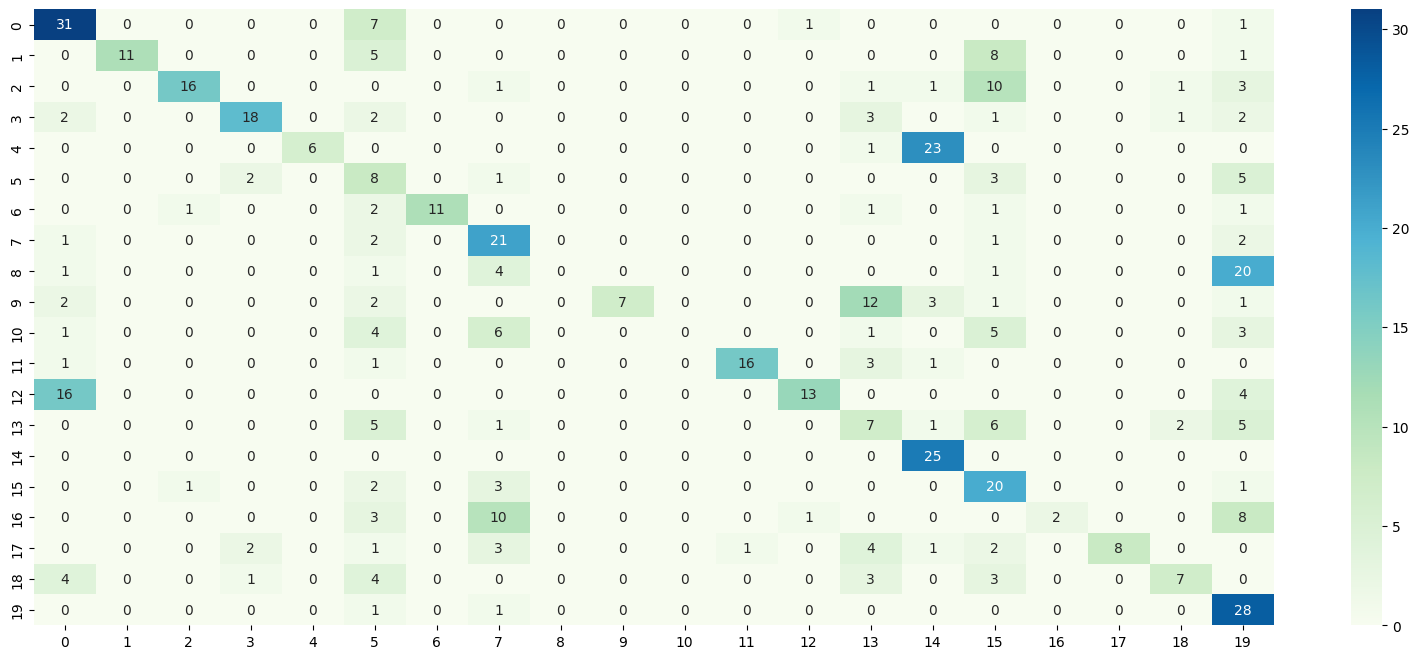

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix(ground_truth, prediksi), annot=True, cmap='GnBu')
plt.show
            

In [4]:
loss_perepoch

[50.0]

In [5]:
akurasi_perepoch

[50.0]

In [11]:
weightF1 = np.round(np.random.randn(20, 169)- 0.5, 3)
weightF1

array([[-1.595, -0.458, -1.061, ...,  0.904, -0.362, -2.079],
       [-1.734,  1.997, -0.134, ..., -1.184, -0.603, -1.233],
       [-0.457, -0.454,  0.99 , ..., -0.24 , -0.583,  0.947],
       ...,
       [-0.261, -0.127, -0.843, ..., -0.262,  0.624, -0.682],
       [ 1.087,  1.795, -1.076, ..., -1.247, -0.764, -1.219],
       [-1.157, -0.367,  0.886, ..., -0.243, -0.718,  0.693]])

In [15]:
np.exp(-6.088)

0.002269944266483836